In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:


## Part 1
## Problem 1
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll, sum(salary)/count(salary) as team_payroll_mean FROM Salaries GROUP BY teamID, yearID"
team_salaries = pd.read_sql(salary_query, conn)


In [3]:
team_salaries

,teamID,yearID,total_payroll,team_payroll_mean
0,ATL,1985,14807000.0,6.730455e+05
1,BAL,1985,11560712.0,5.254869e+05
2,BOS,1985,10897560.0,4.359024e+05
3,CAL,1985,14427894.0,5.152819e+05
4,CHA,1985,9846178.0,4.688656e+05
...,...,...,...,...
855,SLN,2014,120693000.0,4.310464e+06
856,TBA,2014,72689100.0,2.907564e+06
857,TEX,2014,112255059.0,4.677294e+06
858,TOR,2014,109920100.0,4.396804e+06


In [4]:
conn = sqlite3.connect(sqlite_file)
winning_query = "select teamID, yearID,(w*100.0/G) as winning_per, G  from Teams group by teamID, yearID"
winning_table = pd.read_sql(winning_query,conn)



result=pd.merge(winning_table, team_salaries, how='outer', on=['teamID','yearID'])
result
# I use outer-join to join the 2 tables above, that is making any unmatched pantry to NaN.

,teamID,yearID,winning_per,G,total_payroll,team_payroll_mean
0,ALT,1884,24.000000,25.0,NaN,NaN
1,ANA,1997,51.851852,162.0,31135472.0,1.004370e+06
2,ANA,1998,52.469136,162.0,41281000.0,1.214147e+06
3,ANA,1999,43.209877,162.0,55388166.0,1.384704e+06
4,ANA,2000,50.617284,162.0,51464167.0,1.715472e+06
...,...,...,...,...,...,...
2772,WS8,1889,32.283465,127.0,NaN,NaN
2773,WS9,1891,31.654676,139.0,NaN,NaN
2774,WSU,1884,41.228070,114.0,NaN,NaN
2775,NYM,2014,NaN,NaN,54806990.0,2.283625e+06


In [5]:
import matplotlib.pyplot as plt

result['yearID']=result['yearID'].apply(lambda x:int(x))
temp=result[result['yearID']>=1990]
temp=temp[temp['yearID']<=2014]
team_ID_list = temp['teamID'].drop_duplicates()
temp.index=temp['teamID']
temp


,teamID,yearID,winning_per,G,total_payroll,team_payroll_mean
teamID,,,,,,
ANA,ANA,1997,51.851852,162.0,31135472.0,1.004370e+06
ANA,ANA,1998,52.469136,162.0,41281000.0,1.214147e+06
ANA,ANA,1999,43.209877,162.0,55388166.0,1.384704e+06
ANA,ANA,2000,50.617284,162.0,51464167.0,1.715472e+06
ANA,ANA,2001,46.296296,162.0,47535167.0,1.584506e+06
...,...,...,...,...,...,...
WAS,WAS,2012,60.493827,162.0,80855143.0,2.695171e+06
WAS,WAS,2013,53.086420,162.0,113703270.0,4.548131e+06
WAS,WAS,2014,59.259259,162.0,131983680.0,4.399456e+06


The figure below is a generalized one


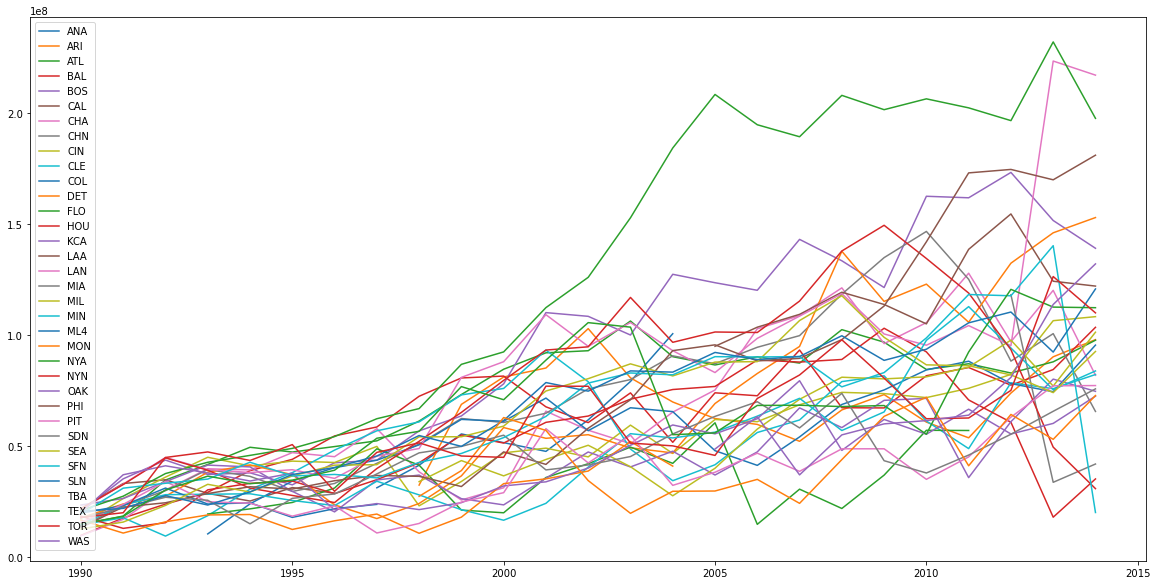

In [6]:
# Problem 2
# for teamID in team_ID_list:
#     if(type(temp.loc[teamID,'yearID']) is not np.int64):
#         plt.plot(temp.loc[teamID,'yearID'],temp.loc[teamID,'total_payroll'],label=teamID)
#         print("The figure below is for team " +teamID)
#         plt.show()

print("The figure below is a generalized one")
plt.figure(figsize=(20,10))
for teamID in team_ID_list:
    if(type(temp.loc[teamID,'yearID']) is not np.int64):
        plt.plot(temp.loc[teamID,'yearID'],temp.loc[teamID,'total_payroll'],label=teamID)

plt.legend()

# Question 1
# From the plot below, we can see that the total_payroll of each team is increasing by time in the long term. 
# Also, the difference between the highest total_payroll and lowest total_payroll is increasing by time as well.

In [7]:
# Problem 3


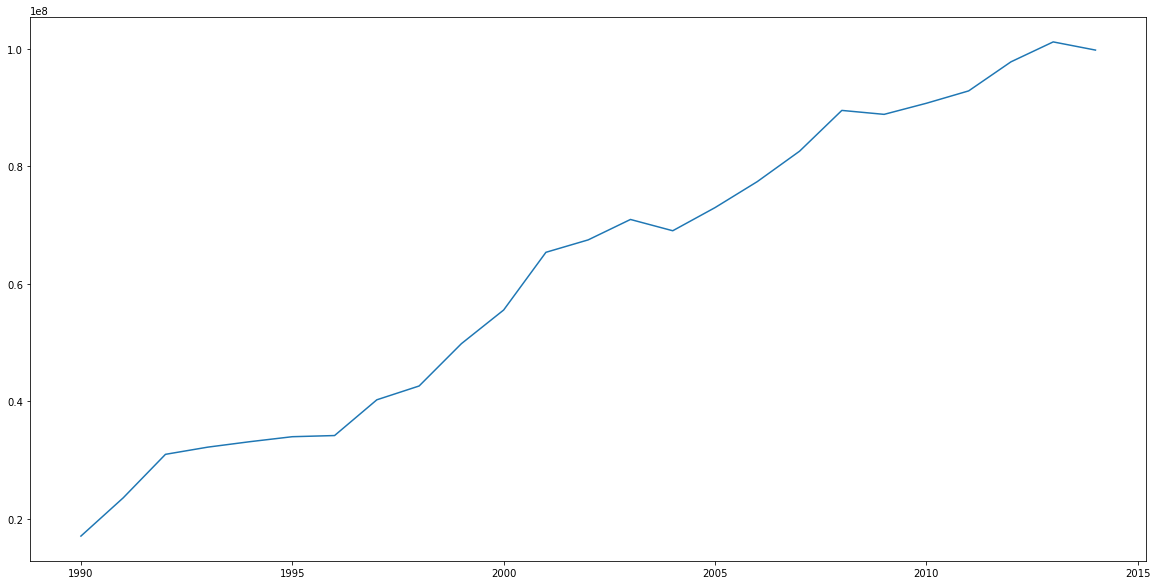

In [8]:

plot_table=temp.groupby(['yearID']).mean()

plt.figure(figsize=(20,10))
plt.plot(plot_table.index,plot_table['total_payroll'])

In [9]:
plot_table

,winning_per,G,total_payroll,team_payroll_mean
yearID,,,,
1990,49.998525,161.923077,1.707235e+07,5.139887e+05
1991,49.997193,161.846154,2.357879e+07,8.970479e+05
1992,50.000000,162.000000,3.098244e+07,1.056331e+06
1993,49.975925,162.071429,3.220500e+07,9.879449e+05
1994,49.993326,114.285714,3.313701e+07,1.063055e+06
1995,49.970376,144.071429,3.398105e+07,9.721240e+05
1996,49.976884,161.928571,3.417798e+07,1.038646e+06
1997,49.998494,161.857143,4.026021e+07,1.233943e+06
1998,49.955924,162.133333,4.260943e+07,1.299881e+06


In [10]:
l=temp['yearID'].tolist()

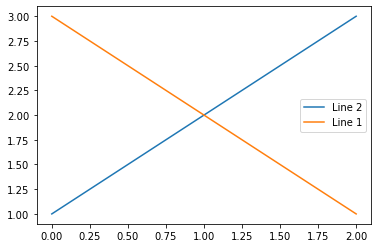

In [11]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend(handles=[line_up, line_down])

In [12]:
# Problem 4



In [13]:
salary_mean_query = "SELECT  teamID,yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
winning_query = "SELECT  teamID,yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"
salary_mean_table = pd.read_sql(salary_mean_query, conn)
winning_table = pd.read_sql(winning_query,conn)

group_table = pd.merge(salary_mean_table, winning_table, how='outer', on=['yearID','teamID'])

bins = [1989,1994,1999,2004,2009,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
#categories = pd.cut(group_table['yearID'],bins,labels=group_names)
group_table['categories'] = pd.cut(group_table['yearID'], bins, labels=group_names)
group_table['categories'].tolist()
grouped = group_table.groupby('categories')
group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2015')
group1

,teamID,yearID,payroll_mean,winning_percentage,categories
130,ATL,1990,4.548594e+05,40.0,1990-1994
131,BAL,1990,2.616239e+05,47.0,1990-1994
132,BOS,1990,6.424479e+05,54.0,1990-1994
133,CAL,1990,6.205714e+05,49.0,1990-1994
134,CHA,1990,3.061774e+05,58.0,1990-1994
...,...,...,...,...,...
259,SEA,1994,8.857121e+05,43.0,1990-1994
260,SFN,1994,1.332458e+06,47.0,1990-1994
261,SLN,1994,9.758534e+05,46.0,1990-1994
262,TEX,1994,9.991999e+05,45.0,1990-1994


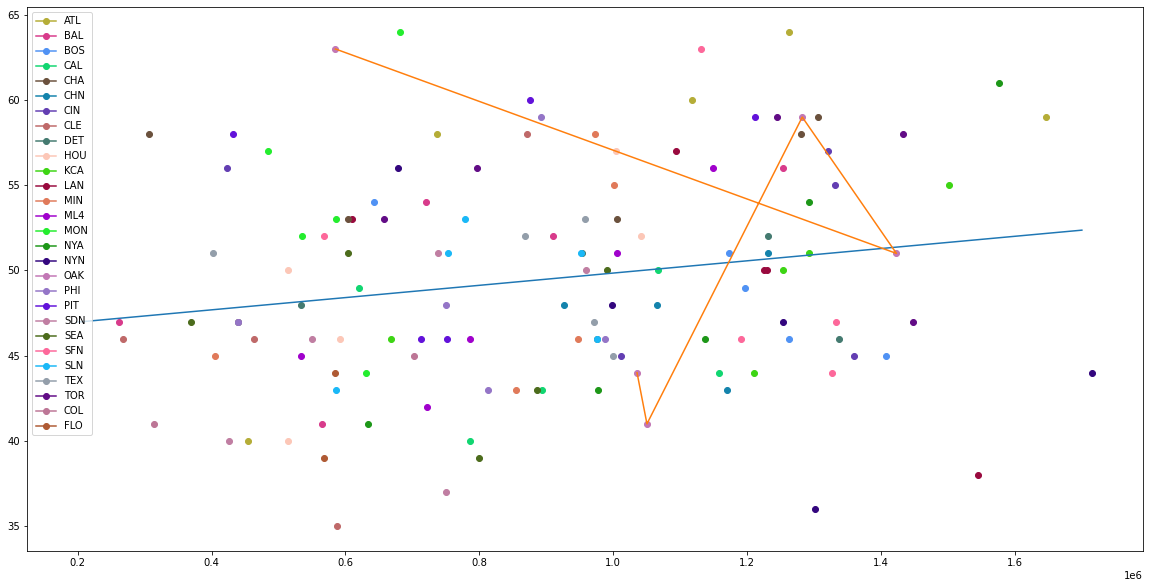

In [14]:
# For group 1
team_list = group1['teamID']
plot_table=group1.drop(columns=['yearID','categories'])
plot_table.index=range(1,135)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['payroll_mean'],plot_table['winning_percentage'],1)   
p = np.poly1d(line)
xp=np.linspace(200000, 1700000, 10)
yp=p(xp)
plt.plot(xp,yp)
oak_table=group1.loc[group1['teamID']=='OAK']
plt.plot(oak_table['payroll_mean'], oak_table['winning_percentage'])
plt.legend()


In [15]:
np.random.rand(3,)

array([0.44107669, 0.94271773, 0.16123819])

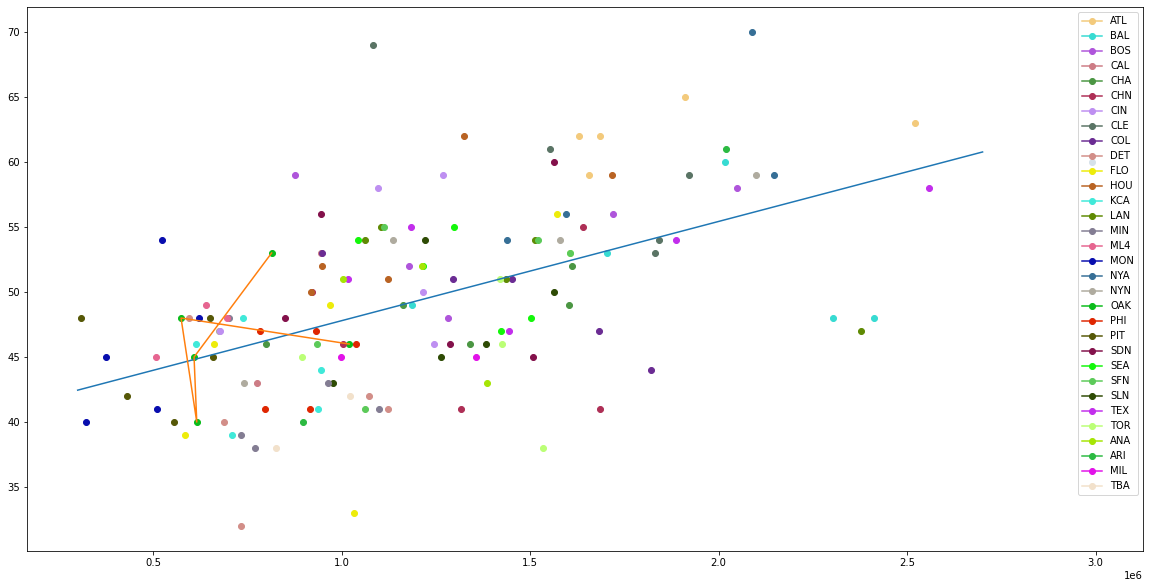

In [16]:
# For group 2
team_list = group2['teamID']
plot_table=group2.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['payroll_mean'],plot_table['winning_percentage'],1)   
p = np.poly1d(line)
xp=np.linspace(300000, 2700000, 2)
yp=p(xp)
plt.plot(xp,yp)
oak_table=group2.loc[group2['teamID']=='OAK']
plt.plot(oak_table['payroll_mean'], oak_table['winning_percentage'])
plt.legend()

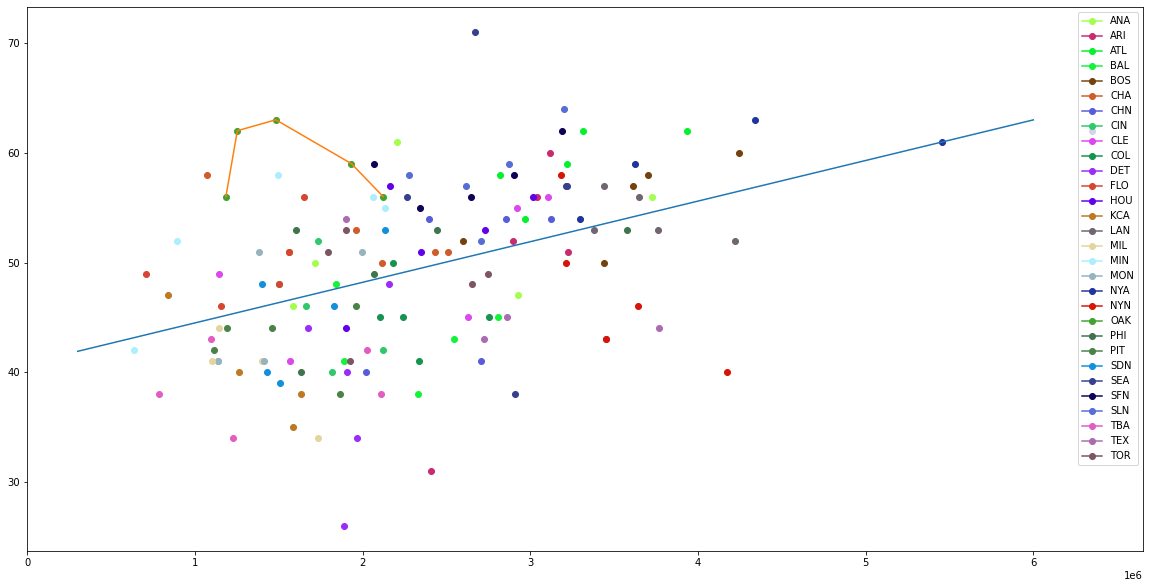

In [17]:
# For group 3
team_list = group3['teamID']
plot_table=group3.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['payroll_mean'],plot_table['winning_percentage'],1)   
p = np.poly1d(line)
xp=np.linspace(300000, 6000000, 2)
yp=p(xp)
plt.plot(xp,yp)
oak_table=group3.loc[group3['teamID']=='OAK']
plt.plot(oak_table['payroll_mean'], oak_table['winning_percentage'])
plt.legend()

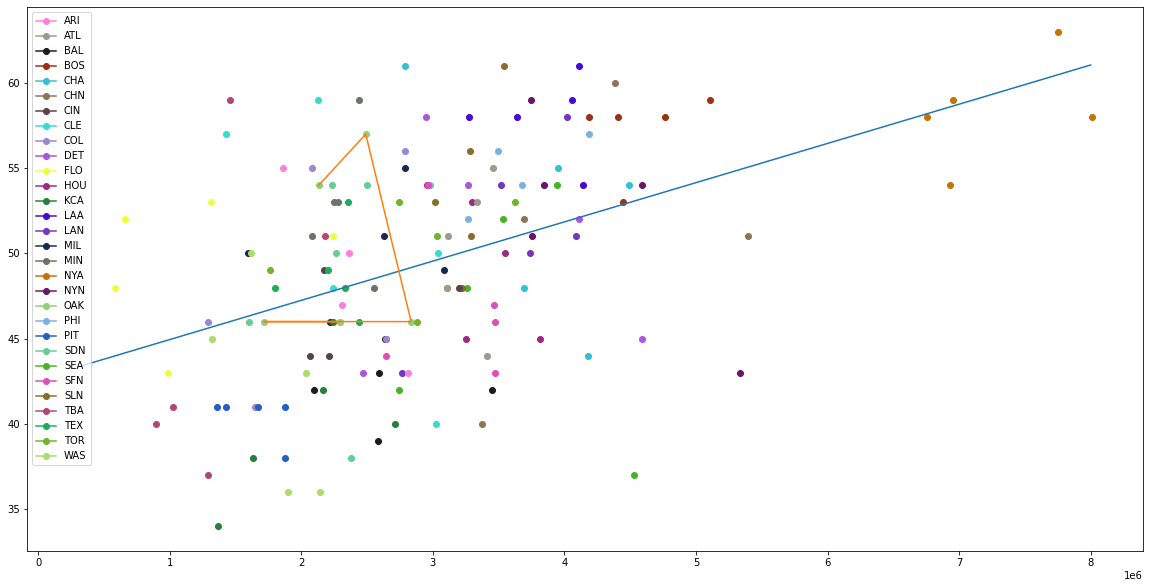

In [18]:
# For group 4
team_list = group4['teamID']
plot_table=group4.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
        

line=np.polyfit(plot_table['payroll_mean'],plot_table['winning_percentage'],1)   
p = np.poly1d(line)
xp=np.linspace(300000, 8000000, 2)
yp=p(xp)
plt.plot(xp,yp)


oak_table=group4.loc[group4['teamID']=='OAK']
plt.plot(oak_table['payroll_mean'], oak_table['winning_percentage'])

plt.legend()

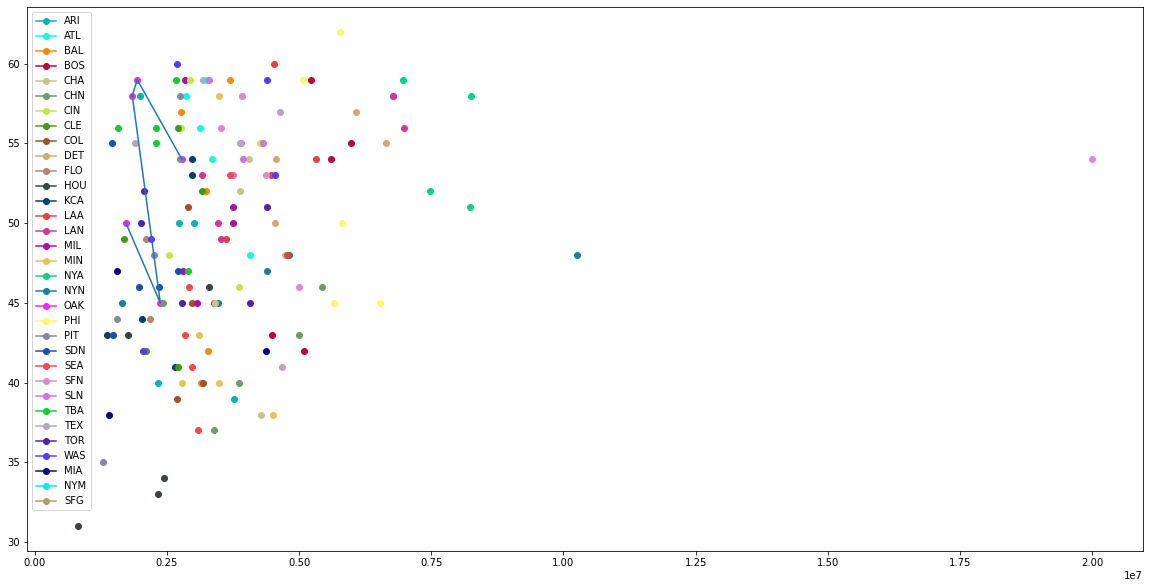

In [19]:
# For group 5
team_list = group5['teamID']
plot_table=group5.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
#plot_table['payroll_mean']=plot_table['payroll_mean'].apply(lambda x:x/1000)


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['payroll_mean'],row['winning_percentage'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
# line=np.polyfit(plot_table['payroll_mean'],plot_table['winning_percentage'],1)   
# p = np.poly1d(line)
# xp=np.linspace(300000, 8000000, 2)
# yp=p(xp)
# plt.plot(xp,yp)

oak_table=group5.loc[group5['teamID']=='OAK']
plt.plot(oak_table['payroll_mean'], oak_table['winning_percentage'])
plt.legend()
# print(plot_table['payroll_mean'].tolist())
# print(plot_table['winning_percentage'].tolist())
# In this case, we cannot find a regression line by np.ployfit since it does not converge by least square 

In [20]:
# Question 2 
# The payroll increases across all these periods.
#
# For the Oakland A's spending efficiency, I notice that the lines of Oakland A go across the regression 
# line for the first, second and fourth time period, which suggests that its spending efficiency is close to the mean.
# For the third time period, the lines of Oakland A is above the regression line, which means the spending efficiency
# is high. For the fifth time period, np.polyfit() cannot give a regression line, but it seems that Oakland A still have
# a spending efficiency close to the mean.


In [21]:
# Problem 5
import statistics
question3_df = team_salaries.copy()
question3_df=question3_df.drop(columns=['total_payroll'])
mean_payroll_table=question3_df.groupby(['yearID']).mean()
std_payroll_table=question3_df.groupby(['yearID']).std()
std_payroll_table


result['standardized_payroll']=pd.Series(np.nan, index=result.index)

for i, row in result.iterrows():
    year = row['yearID']
    if year>=1985 and year <=2014:
        mean=mean_payroll_table.loc[year,'team_payroll_mean']
        std = std_payroll_table.loc[year,'team_payroll_mean']
        team_payroll_mean = row['team_payroll_mean']
        std_payroll = (team_payroll_mean-mean)/std
        result.loc[i,'standardized_payroll']=std_payroll
        
        #print(row['standardized_payroll'])
          

result

,teamID,yearID,winning_per,G,total_payroll,team_payroll_mean,standardized_payroll
0,ALT,1884,24.000000,25.0,NaN,NaN,NaN
1,ANA,1997,51.851852,162.0,31135472.0,1.004370e+06,-0.528661
2,ANA,1998,52.469136,162.0,41281000.0,1.214147e+06,-0.168201
3,ANA,1999,43.209877,162.0,55388166.0,1.384704e+06,-0.181448
4,ANA,2000,50.617284,162.0,51464167.0,1.715472e+06,-0.362224
...,...,...,...,...,...,...,...
2772,WS8,1889,32.283465,127.0,NaN,NaN,NaN
2773,WS9,1891,31.654676,139.0,NaN,NaN,NaN
2774,WSU,1884,41.228070,114.0,NaN,NaN,NaN
2775,NYM,2014,NaN,NaN,54806990.0,2.283625e+06,-0.694316


In [22]:
#Problem 6


problem6_df = result.copy()
problem6_df = problem6_df.loc[problem6_df['yearID']>=1990]
problem6_df = problem6_df.loc[problem6_df['yearID']<=2014]
problem6_df=problem6_df.drop(columns=['G','total_payroll','team_payroll_mean'])
problem6_df.dropna()

,teamID,yearID,winning_per,standardized_payroll
1,ANA,1997,51.851852,-0.528661
2,ANA,1998,52.469136,-0.168201
3,ANA,1999,43.209877,-0.181448
4,ANA,2000,50.617284,-0.362224
5,ANA,2001,46.296296,-0.856538
...,...,...,...,...
2683,WAS,2010,42.592593,-0.856099
2684,WAS,2011,49.689441,-0.774365
2685,WAS,2012,60.493827,-0.623936
2686,WAS,2013,53.086420,0.536327


In [23]:
bins = [1989,1994,1999,2004,2009,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
#categories = pd.cut(group_table['yearID'],bins,labels=group_names)
problem6_df['categories'] = pd.cut(problem6_df['yearID'], bins, labels=group_names)
problem6_df['categories'].tolist()
grouped = problem6_df.groupby('categories')
group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2015')


,teamID,yearID,winning_per,standardized_payroll,categories
50,ATL,1990,40.123457,-0.513311,1990-1994
51,ATL,1991,58.024691,-0.656737,1990-1994
52,ATL,1992,60.493827,0.190807,1990-1994
53,ATL,1993,64.197531,0.908389,1990-1994
54,ATL,1994,59.649123,1.869895,1990-1994
...,...,...,...,...,...
2639,TOR,1990,53.086420,1.247239,1990-1994
2640,TOR,1991,56.172840,-0.412027,1990-1994
2641,TOR,1992,59.259259,0.591159,1990-1994
2642,TOR,1993,58.641975,1.474949,1990-1994


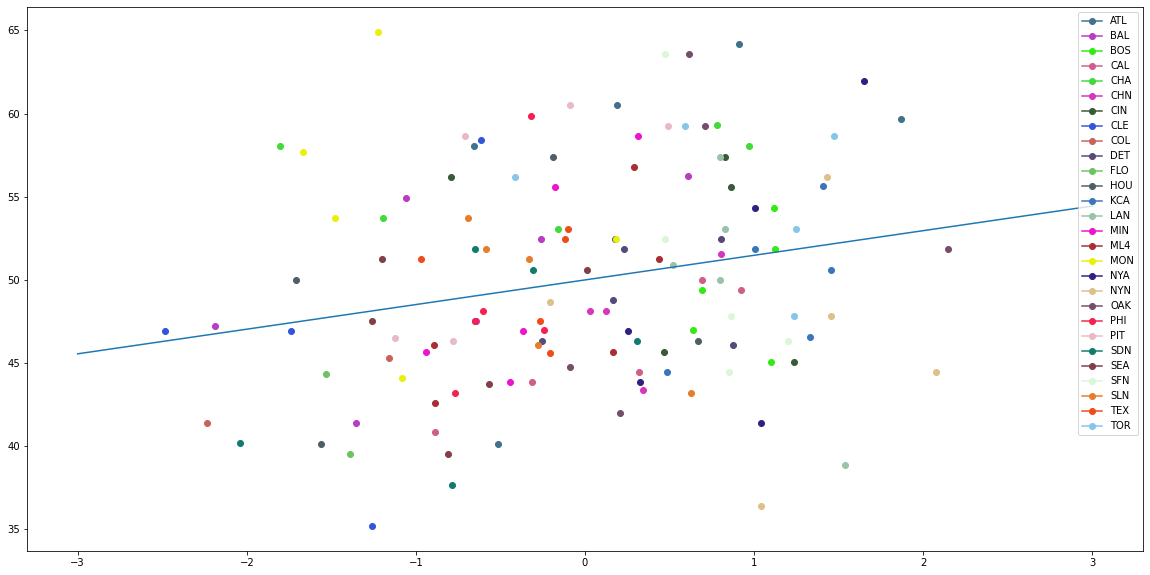

In [24]:
#Group1
team_list = group1['teamID']
plot_table=group1.drop(columns=['yearID','categories'])
plot_table.index=range(1,135)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['standardized_payroll'],plot_table['winning_per'],1)   
p = np.poly1d(line)
xp=np.linspace(-3, 3, 10)
yp=p(xp)
plt.plot(xp,yp)

plt.legend()
group1

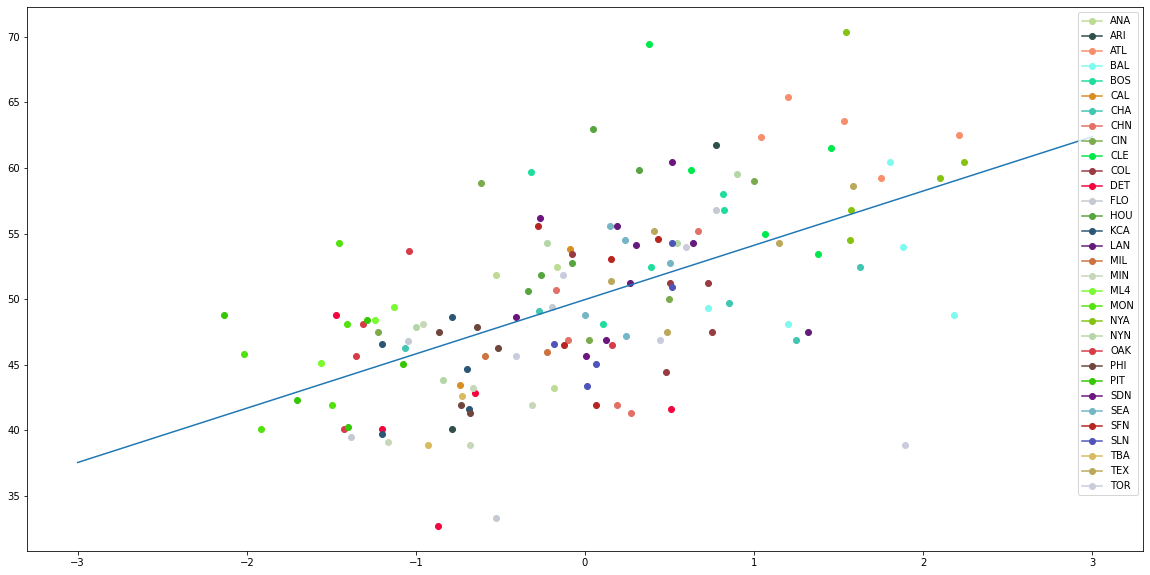

In [25]:
#Group2
team_list = group2['teamID']
plot_table=group2.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['standardized_payroll'],plot_table['winning_per'],1)   
p = np.poly1d(line)
xp=np.linspace(-3, 3, 10)
yp=p(xp)
plt.plot(xp,yp)


plt.legend()

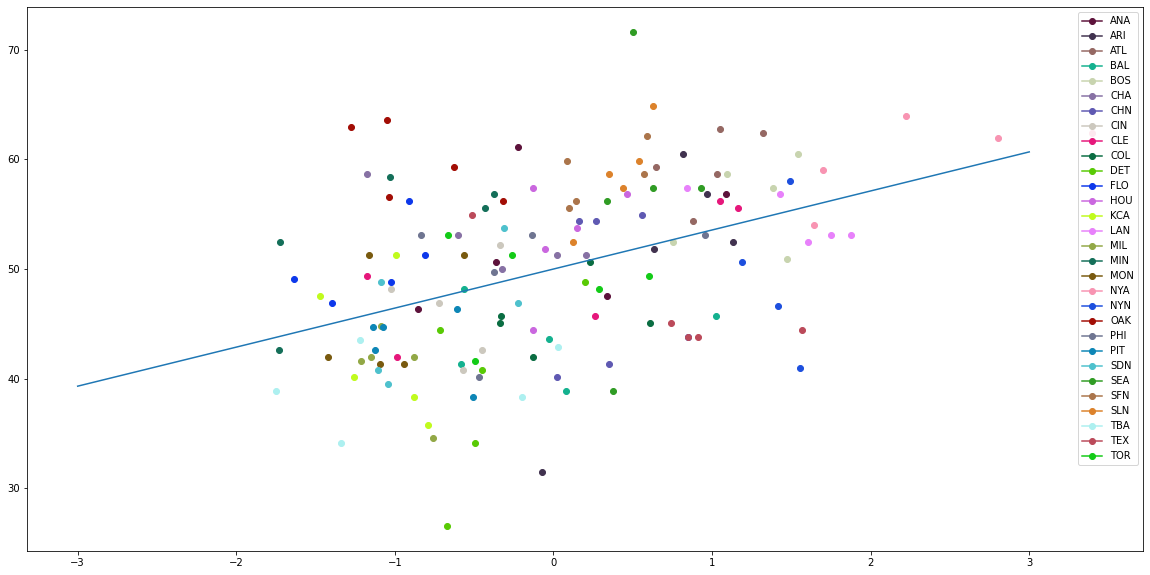

In [26]:
#Group2
team_list = group3['teamID']
plot_table=group3.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['standardized_payroll'],plot_table['winning_per'],1)   
p = np.poly1d(line)
xp=np.linspace(-3, 3, 10)
yp=p(xp)
plt.plot(xp,yp)

plt.legend()

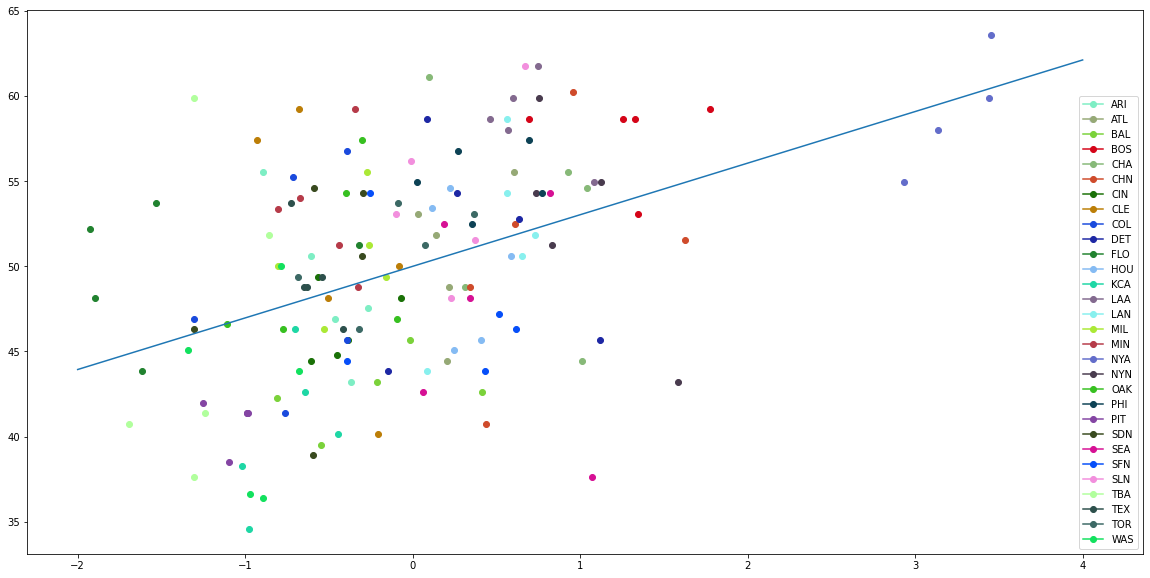

In [27]:
#Group4
team_list = group4['teamID']
plot_table=group4.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
line=np.polyfit(plot_table['standardized_payroll'],plot_table['winning_per'],1)   
p = np.poly1d(line)
xp=np.linspace(-2, 4, 10)
yp=p(xp)
plt.plot(xp,yp)

plt.legend()

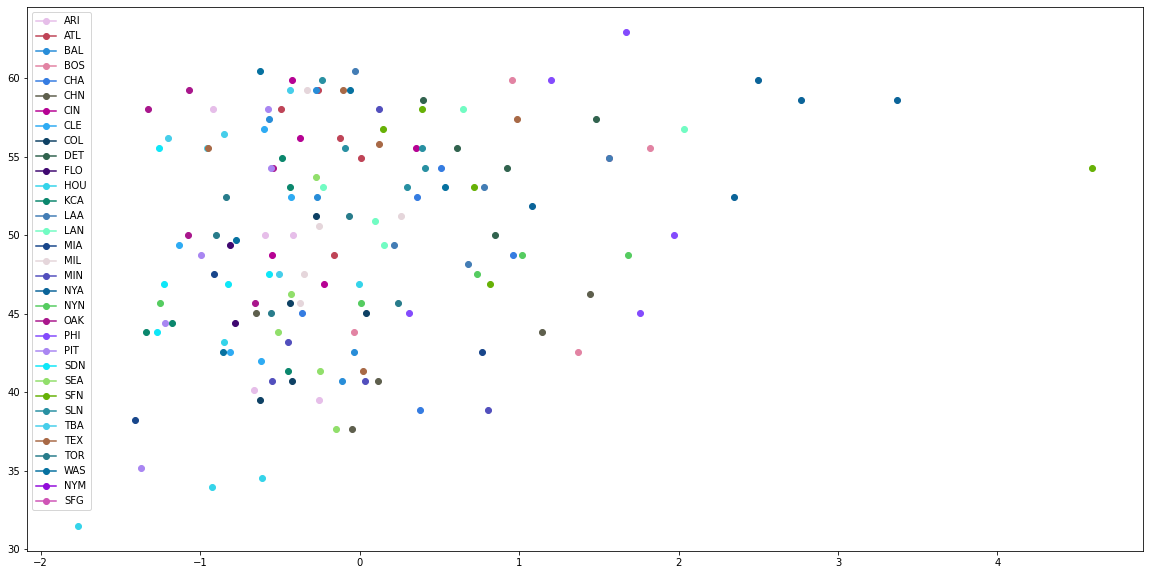

In [28]:
#Group5
team_list = group5['teamID']
plot_table=group5.drop(columns=['yearID','categories'])
plot_table.index=range(1,len(plot_table)+1)
plot_table


plot_table
dict_team={}
plt.figure(figsize=(20,10))
for i, row in plot_table.iterrows():
    team_name = row['teamID']
    
    if team_name in dict_team:
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',color=dict_team[team_name])
        
    else:
        a=np.random.rand(3,)
        plt.plot(row['standardized_payroll'],row['winning_per'],marker='o',label=row['teamID'],color=a)
        dict_team[team_name]=a
# line=np.polyfit(plot_table['standardized_payroll'],plot_table['winning_per'],1)   
# p = np.poly1d(line)
# xp=np.linspace(-3, 3, 10)
# yp=p(xp)
# plt.plot(xp,yp)

plt.legend()

In [29]:
# Question 3
# The plot are very similar to each other, except that the unit of the horizontal axis changed a lot. 
# By the transformation, we make the standardized_payroll close to 0 within a much smaller range.

In [30]:
group_table

,teamID,yearID,payroll_mean,winning_percentage,categories
0,ATL,1985,673045.454545,40.0,NaN
1,BAL,1985,525486.909091,51.0,NaN
2,BOS,1985,435902.400000,49.0,NaN
3,CAL,1985,515281.928571,55.0,NaN
4,CHA,1985,468865.619048,52.0,NaN
...,...,...,...,...,...
2772,WS8,1887,NaN,36.0,NaN
2773,WS8,1888,NaN,35.0,NaN
2774,WS8,1889,NaN,32.0,NaN
2775,WS9,1891,NaN,31.0,NaN


array([ 2.85310865, 49.9866575 ])

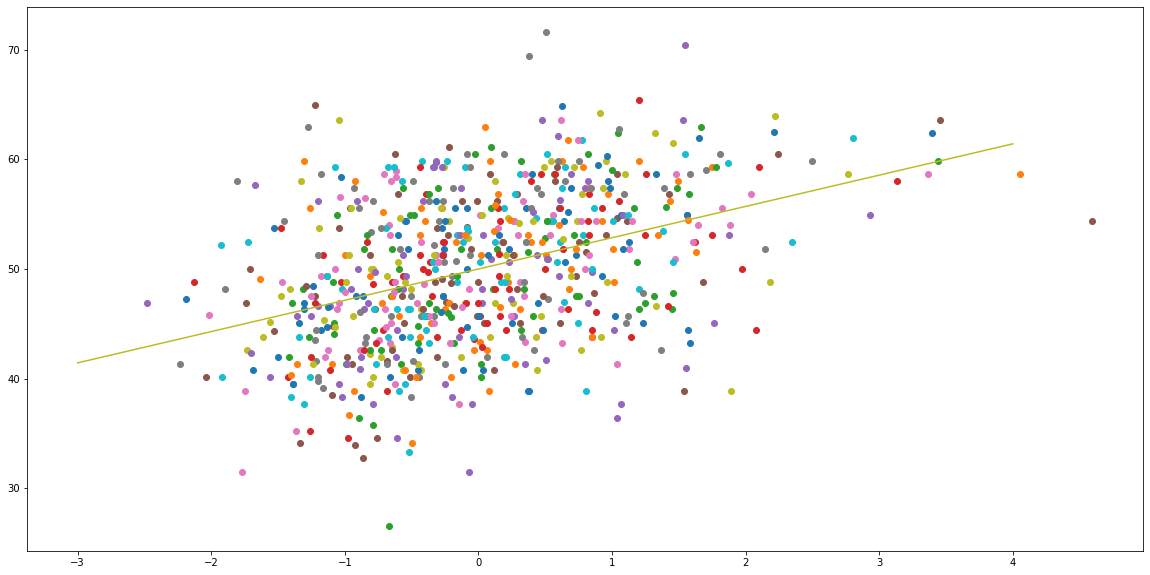

In [31]:
#Problem 7
problem7_df=problem6_df.dropna()
problem7_df
plt.figure(figsize=(20,10))
line=np.polyfit(problem7_df['standardized_payroll'],problem7_df['winning_per'],1)   
for i, row in problem7_df.iterrows():
    plt.plot(row['standardized_payroll'],row['winning_per'],'o')

p = np.poly1d(line)
xp=np.linspace(-3, 4, 10)
yp=p(xp)
plt.plot(xp,yp)
line

In [32]:
#Problem 8
result['efficiency']=pd.Series(np.nan, index=result.index)
for i, row in result.iterrows():
    std_payroll = row['standardized_payroll']
    exp_win_rate=50+2.5*std_payroll
    result.loc[i,'efficiency']=row['winning_per']-exp_win_rate

In [33]:
result

,teamID,yearID,winning_per,G,total_payroll,team_payroll_mean,standardized_payroll,efficiency
0,ALT,1884,24.000000,25.0,NaN,NaN,NaN,NaN
1,ANA,1997,51.851852,162.0,31135472.0,1.004370e+06,-0.528661,3.173505
2,ANA,1998,52.469136,162.0,41281000.0,1.214147e+06,-0.168201,2.889640
3,ANA,1999,43.209877,162.0,55388166.0,1.384704e+06,-0.181448,-6.336503
4,ANA,2000,50.617284,162.0,51464167.0,1.715472e+06,-0.362224,1.522845
...,...,...,...,...,...,...,...,...
2772,WS8,1889,32.283465,127.0,NaN,NaN,NaN,NaN
2773,WS9,1891,31.654676,139.0,NaN,NaN,NaN,NaN
2774,WSU,1884,41.228070,114.0,NaN,NaN,NaN,NaN
2775,NYM,2014,NaN,NaN,54806990.0,2.283625e+06,-0.694316,NaN


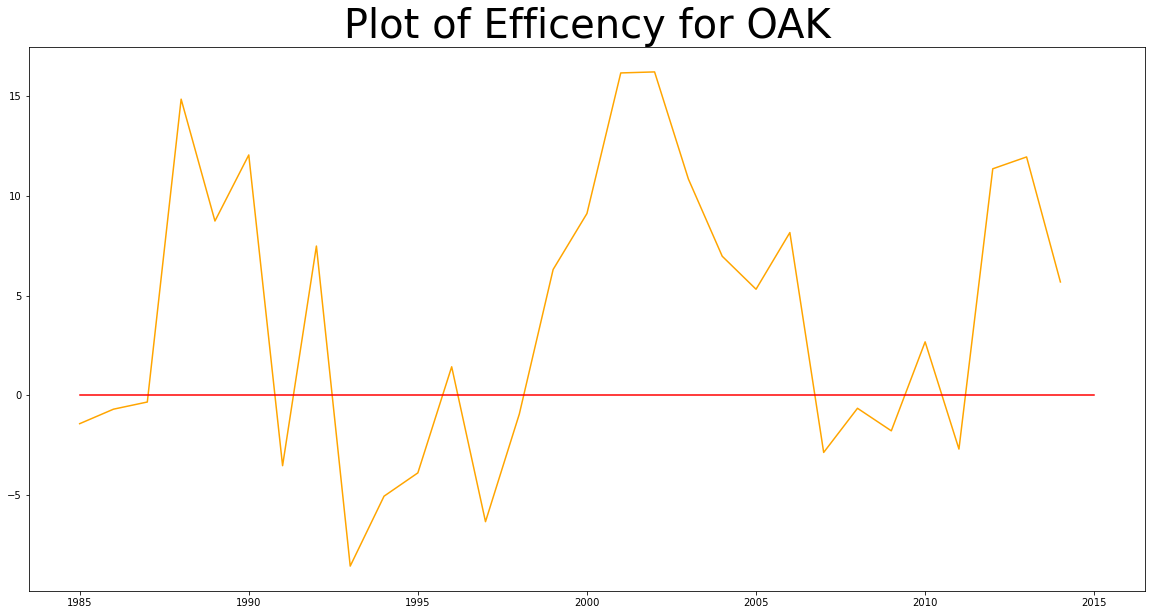

In [34]:
# Team OAK
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='OAK']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],color='orange')
plt.title("Plot of Efficency for OAK", fontsize=40)
plt.plot([1985,2015],[0,0],color='red')
plt.show()

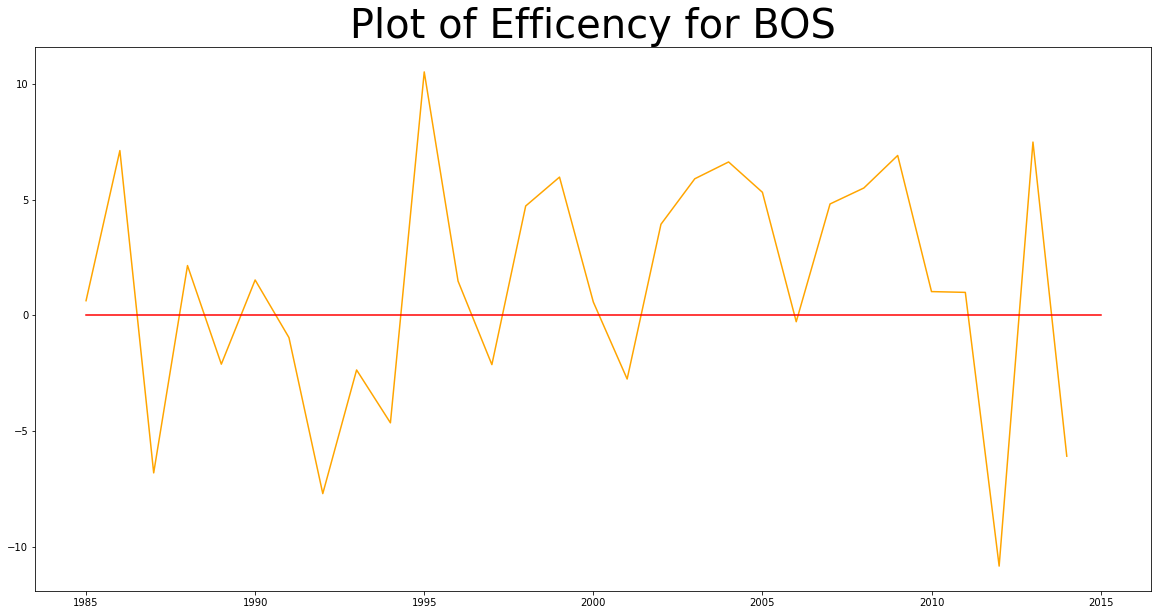

In [35]:
# Team BOS
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='BOS']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],color='orange')
plt.title("Plot of Efficency for BOS", fontsize=40)
plt.plot([1985,2015],[0,0],color='red')
plt.show()

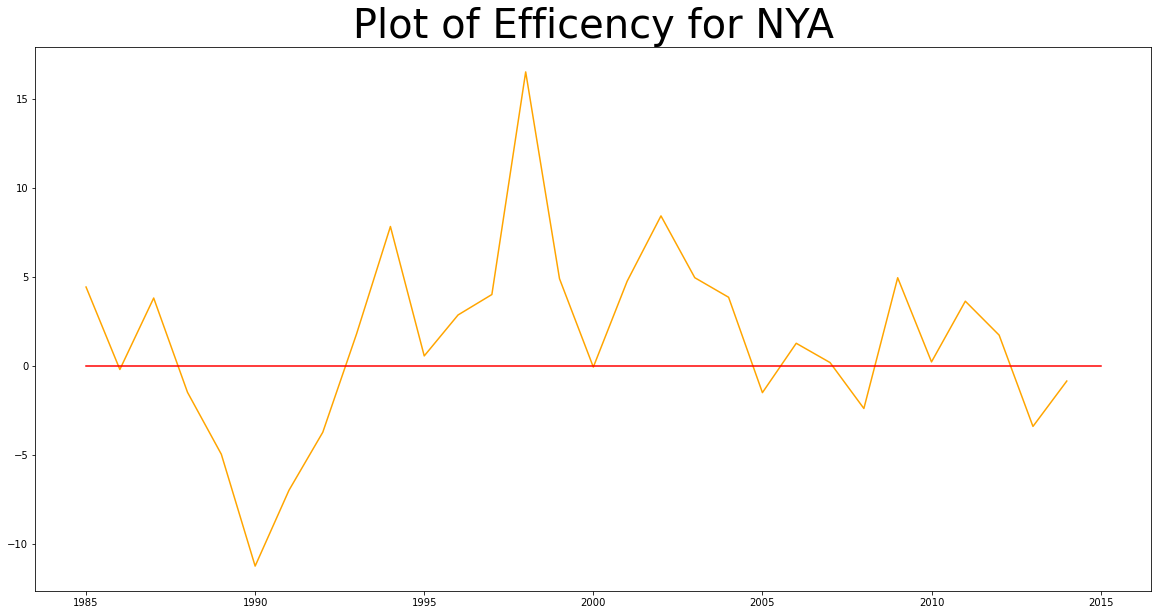

In [36]:
# Team NYA
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='NYA']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],color='orange')
plt.title("Plot of Efficency for NYA", fontsize=40)
plt.plot([1985,2015],[0,0],color='red')
plt.show()

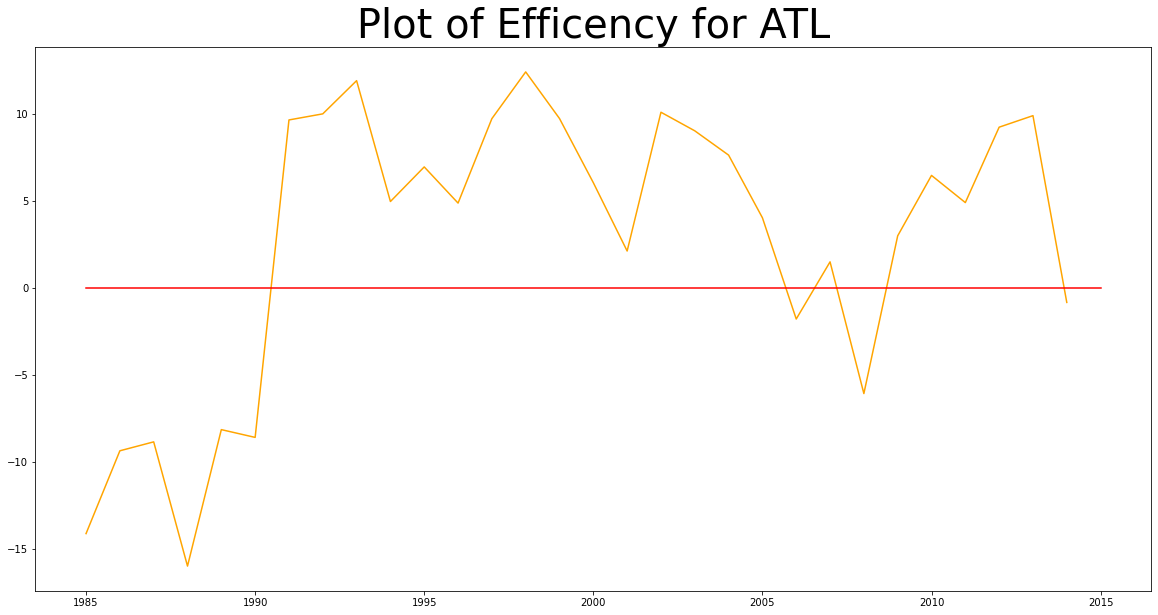

In [37]:
# Team ATL
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='ATL']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],color='orange')
plt.title("Plot of Efficency for ATL", fontsize=40)
plt.plot([1985,2015],[0,0],color='red')
plt.show()

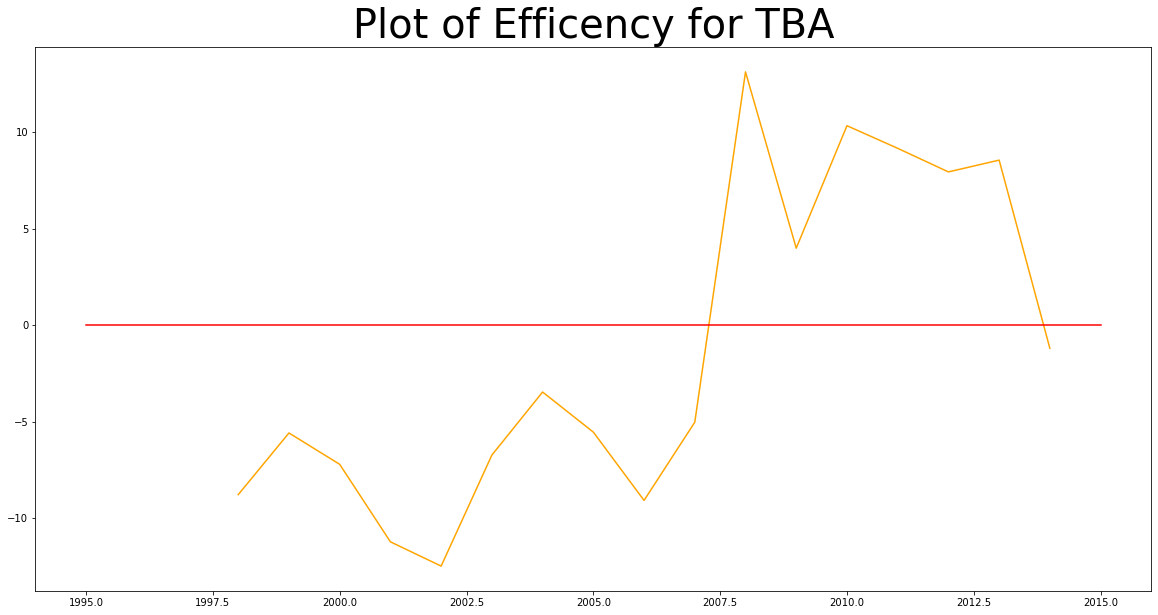

In [41]:
# Team TBA
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='TBA']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],color='orange')
plt.title("Plot of Efficency for TBA", fontsize=40)
plt.plot([1995,2015],[0,0],color='red')
plt.show()

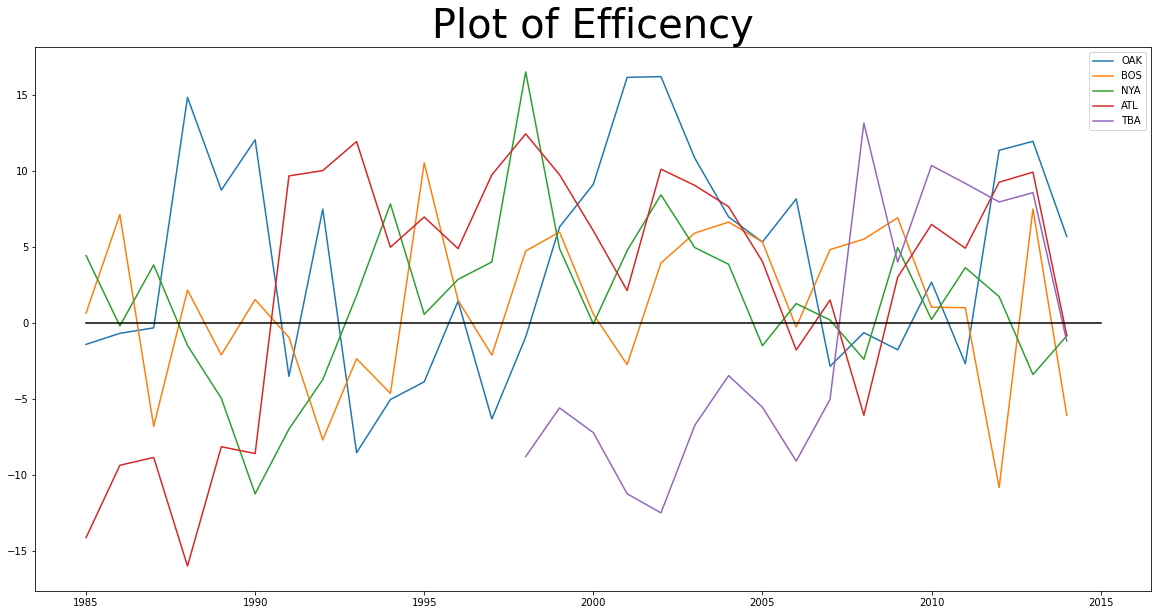

In [40]:
plt.figure(figsize=(20,10))
temp_set = result.loc[result['teamID']=='OAK']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],label='OAK')
temp_set = result.loc[result['teamID']=='BOS']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],label='BOS')
temp_set = result.loc[result['teamID']=='NYA']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],label='NYA')
temp_set = result.loc[result['teamID']=='ATL']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],label='ATL')
temp_set = result.loc[result['teamID']=='TBA']
temp_set=temp_set.dropna()
plt.plot(temp_set['yearID'],temp_set['efficiency'],label='TBA')
plt.title("Plot of Efficency", fontsize=40)
plt.plot([1985,2015],[0,0],color='black')

plt.legend()

In [ ]:
# Question 4:
# The plot is much more direct on showing whether a team's payroll is efficient or not compared to the plot in problem 2 and 3.
# It seems from the plot that the efficiency of OAK is high on 1987 to 1992 and 1997 to 2005, and the conclusion is more persuasive than the conclusion from problem 2 and 3. 